## How to generate Possion process sequences?

# Method1. Using Poisson process, the time interval of event occurrence satisfies the exponential distribution of $\lambda e^{-\lambda t}$ ($\lambda$ is the number of events per unit time), and the average value of exponential distribution is  $\frac{T}{rate}$. The intervals here are all integers.

In [9]:

import numpy as np
import random
import matplotlib.pyplot as plt

def possion_generation(T,rate,dt): 
    import random
    t= 0

    spike = np.array([0 for _ in range(int(T/dt))]) #spike的位数和总步数一致，单位时间是一个步数
    while True:
        t+= random.expovariate(((rate*dt)/1000))#产生间隔，指数分布的参数lambda=rate/T。在这里的单位时间是dt/1000,因此，单位时间内发生的事件数目为rate*dt/1000
        if t>int(T/dt):
            break
        spike[int(t)]=1 
    return spike
def pulse(N_x,Time,dt,rate):
    pulse_=[]
    for i in range(N_x):
        pulse_.append(possion_generation(Time,rate,dt))
    pulse_=np.array(pulse_).T
    return pulse_

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

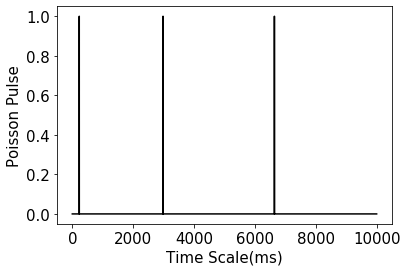

In [10]:
plt.plot(pulse(4,1000,0.1,5)[:,2],color='black')
plt.xlabel("Time Scale(ms)",fontsize=15)
plt.ylabel("Poisson Pulse",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig('Poisson-Pulse5.pdf',dpi=1000, bbox_inches = 'tight')

# Methdod2. By using the exponential distribution of the time interval of events in Poisson process, the cumulative distribution function (CDF) can be written as $CDF = P = 1-e ^ {- [lambda t} $, and CDF returns the probability that the time interval between successive arrivals is less than or equal to a certain value T. We write its inverse function $f ^ {- 1}_ {t}(p) = -\frac{ln(1-p)}{\lambda}$。 We can also input the probability p with uniform distribution between 0 and 1 to return that the time interval between events is 0-t

In [11]:
def possion_generation2(T,rate,dt): 
    import random
    import math

    _lambda = rate*dt/1000
    _arrival_time = 0

    spike = np.array([0 for _ in range(int(T/dt))])
    arrival=[]
    while True:
        p = random.random()
        _inter_arrival_time = -math.log(1.0 - p)/_lambda
        _arrival_time = _arrival_time + _inter_arrival_time
        if _arrival_time>int(T/dt):
            break
        arrival.append(int(_arrival_time))
    spike[(arrival)]=1
    plt.plot(spike[0:T])
    return spike

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

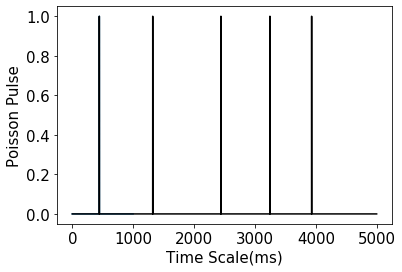

In [12]:
plt.plot(possion_generation2(1000,5,0.2),color='black')
plt.xlabel("Time Scale(ms)",fontsize=15)
plt.ylabel("Poisson Pulse",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig('Poisson-Pulse5.pdf',dpi=1000, bbox_inches = 'tight')

# Method3. Using the arrival time of Poisson distribution satisfying gamma distribution $f(x)=\frac{x^{(\alpha-1)} \lambda^{\alpha} e^{(-\lambda x)}}{\Gamma(\alpha)}=\frac{x^{(\alpha-1)} e^{\left(-\frac{1}{\beta} x\right)}}{\beta^{\alpha} \Gamma(\alpha)}, \mathrm{x}>0$.


In [22]:
def poisoon_generation3(T,rate,dt):
    time_all=[]
    _lambda=rate*dt/T
    _arrival_time = 0

    spike = np.array([0 for _ in range(int(T/dt))])
    while True:
        t= random.gammavariate(i, 1000/(rate*dt))
        if t>int(T/dt):
            break
        time_all.append(int(t))
    spike[(time_all)]=1
    
    return spike


In [68]:
#Sparsely connected matrix
def EI_M(Number1,Number2,pr,J):
    matrix=np.zeros((Number1,Number2))
    matrix_p=np.random.rand(Number1,Number2)
    matrix[matrix_p<pr]=J
    return matrix

N=10000
N_e=int(N*0.8)
N_i=int(N*0.2)
tau_m=20
V_t=-52
V_r=-70
p=0.1
tref=2
K_e=p*N_e
K_i = p*N_i
j_ee=25 
j_ie=112.5
j_ei=150
j_ii=250
j_exte=180
j_exti=135

J_ee=j_ee/np.sqrt(N); 
J_ie=j_ie/np.sqrt(N); 
J_ei=j_ei/np.sqrt(N); 
J_ii=j_ii/np.sqrt(N); 


J_exte=j_exte/np.sqrt(N);
J_exti=j_exti/np.sqrt(N);


#connection matrices:
M_EE=EI_M(N_e,N_e,p,J_ee)
M_IE=EI_M(N_i,N_e,p,J_ie)
M_EI = EI_M(N_e,N_i,p,J_ei)
M_II =EI_M(N_i,N_i,p,J_ii)
#initial voltage
J_EXEE=EI_M(N_e,N_e,p,J_exte)
J_EXII=EI_M(N_i,N_e,p,J_exti)


## The matrice to realize the rest-time.
def update_matrix1(M):    
    N=np.array(M)*1
    N[np.where(M>0)]=0
    N[np.where(M==0)]=1    
    return N
def update_matrix2(M,dt,rest):
    N=np.array(M)*1
    N[M>=((rest/dt)-1)]=0
    return N
def turn_2_zero(M):
    if M<0:
        return 0
    else:
        return M
    
    
## The matrix to initialize the voltage      
def randlc(N_x,up,down):
    import random
    rando=[]
    for i in range(N_x):
        rando.append(random.uniform(down,up))
    return np.array(rando).reshape(N_x,1)

In [63]:
def time_interaction(dt,T,tau_m,tau_e,tau_i,rate):
    
    max_pic=int(T/dt)
    pulse_e=pulse(N_e,T,dt,rate)
    
    V_e=randlc(N_e,V_t,V_r)
    V_i=randlc(N_i,V_t,V_r)
    I_e=np.zeros((N_e,1))
    I_i = np.zeros((N_i,1))

    
    V_e_all=[]
    V_i_all=[]
    
    Ve_count=np.zeros((N_e,1))
    Vi_count=np.zeros((N_i,1))
    
    current_i=[]
    current_e=[]
    currents=[]
    Total_spike_e=[]
    Total_spike_i = []
    for t in np.linspace(dt,T,max_pic):
        
        Ve_count=update_matrix2(Ve_count,dt,tref)
        Vi_count=update_matrix2(Vi_count,dt,tref)
        
        V_e_all.append((V_e)*1)
        V_i_all.append((V_i)*1)
        
        
        spick_num_ie=np.zeros((N_i,1))
        spick_num_ii=np.zeros((N_i,1))
                
        spick_num_ee=np.zeros((N_e,1))
        spick_num_ei=np.zeros((N_e,1))
        
        
        
        index_spike_e=np.where(V_e>=V_t)
        
        
        
        if (len(index_spike_e[0])>0):
            V_e[index_spike_e]=V_r
            
            for j in range(len(index_spike_e[0])): 
                numee_index=np.where(M_EE[:,index_spike_e[0][j]]!=0)
                spick_num_ee[numee_index] = spick_num_ee[numee_index]+1
                
                numie_index=np.where(M_IE[:,index_spike_e[0][j]]!=0)
                spick_num_ie[numie_index] = spick_num_ie[numie_index]+1
          

        index_spike_i=np.where(V_i>=V_t)    

        if (len(index_spike_i[0])>0):
            V_i[index_spike_i]=V_r 
            for k in range(len(index_spike_i[0])):
                numei_index=np.where(M_EI[:,index_spike_i[0][k]]!=0)
                spick_num_ei[numei_index]=spick_num_ei[numei_index]+1 
                
                numii_index=np.where(M_II[:,index_spike_i[0][k]]!=0)
                spick_num_ii[numii_index] = spick_num_ii[numii_index]+1
                
               
        list_e=list(set(list(np.where(Ve_count>0)[0])+list(index_spike_e[0])))
        list_i=list(set(list(np.where(Vi_count>0)[0])+list(index_spike_i[0])))
        
        Ve_count[list_e] = Ve_count[list_e]+1
        Vi_count[list_i] = Vi_count[list_i]+1
        
        s1=pulse_e[int(t/dt-1)].reshape(N_e,1)
        s2=pulse_e[int(t/dt-1)].reshape(N_e,1)
        
        I_e=I_e*1+(dt/tau_e)*(-I_e)+(tau_m/tau_e)*((J_ee*spick_num_ee-J_ei*spick_num_ei+np.dot(J_EXEE,s1))*1)
        I_i=I_i*1+(dt/tau_i)*(-I_i)+(tau_m/tau_i)*((J_ie*spick_num_ie-J_ii*spick_num_ii*1+np.dot(J_EXII,s2))*1)
        
        V_e = V_e*1+((dt/tau_m)*(-V_e+V_r+I_e))*1*update_matrix1(Ve_count)
        V_i = V_i*1+((dt/tau_m)*(-V_i+V_r+I_i))*1*update_matrix1(Vi_count)
        if t>1600:
            Total_spike_e.append(len(index_spike_e[0]))
            Total_spike_i.append(len(index_spike_i[0]))
    
        current_e.append(((J_ee*spick_num_ee+np.dot(J_EXEE,s1))))
        current_i.append(-J_ei*spick_num_ei*1)
    r_e = np.sum(Total_spike_e)/(((T-1600)*0.001)*N_e)
    r_i = np.sum(Total_spike_i)/(((T-1600)*0.001)*N_i)
    print(r_e)
    print(r_i)

    return r_e,r_i
            
            

In [64]:
r_e,r_i=time_interaction(0.5,2000,20,10,10,50)

137.5515625
317.2125


In [14]:
#simulations
r_E=[]
r_I = []
for i in range(100):
    r_e,r_i=time_interaction(0.5,1000,20,10,10,(i+1))
    r_E.append(r_e)
    r_I.append(r_i)
    print(r_E)


1.914375
4.89875
[1.914375]
4.5875
12.0825
[1.914375, 4.5875]
7.2796875
19.2725
[1.914375, 4.5875, 7.2796875]
9.8959375
26.0375
[1.914375, 4.5875, 7.2796875, 9.8959375]
12.3484375
32.37875
[1.914375, 4.5875, 7.2796875, 9.8959375, 12.3484375]
15.12625
39.6475
[1.914375, 4.5875, 7.2796875, 9.8959375, 12.3484375, 15.12625]
17.681875
46.26875
[1.914375, 4.5875, 7.2796875, 9.8959375, 12.3484375, 15.12625, 17.681875]
20.1990625
52.60125
[1.914375, 4.5875, 7.2796875, 9.8959375, 12.3484375, 15.12625, 17.681875, 20.1990625]
23.0175
59.7575
[1.914375, 4.5875, 7.2796875, 9.8959375, 12.3484375, 15.12625, 17.681875, 20.1990625, 23.0175]
25.3490625
65.51
[1.914375, 4.5875, 7.2796875, 9.8959375, 12.3484375, 15.12625, 17.681875, 20.1990625, 23.0175, 25.3490625]
28.170625
72.525
[1.914375, 4.5875, 7.2796875, 9.8959375, 12.3484375, 15.12625, 17.681875, 20.1990625, 23.0175, 25.3490625, 28.170625]
30.475
78.42125
[1.914375, 4.5875, 7.2796875, 9.8959375, 12.3484375, 15.12625, 17.681875, 20.1990625, 23.0175

[1.914375, 4.5875, 7.2796875, 9.8959375, 12.3484375, 15.12625, 17.681875, 20.1990625, 23.0175, 25.3490625, 28.170625, 30.475, 33.318125, 36.21125, 38.90125, 41.1996875, 44.511875, 46.46625, 49.3721875, 52.2328125, 54.7415625, 57.6365625, 60.8134375, 62.9046875, 65.831875, 68.59375, 71.14625, 73.745625, 76.35125, 79.225, 81.9971875, 85.0640625, 87.299375, 90.6121875, 93.021875, 95.96875, 98.9775, 101.9496875, 104.17, 107.748125, 110.294375, 113.4378125, 116.18375, 118.6253125, 122.2825, 124.8884375, 128.1484375, 130.90375, 133.9046875, 136.9846875, 139.9878125, 143.36625, 146.6603125]
150.0215625
342.23
[1.914375, 4.5875, 7.2796875, 9.8959375, 12.3484375, 15.12625, 17.681875, 20.1990625, 23.0175, 25.3490625, 28.170625, 30.475, 33.318125, 36.21125, 38.90125, 41.1996875, 44.511875, 46.46625, 49.3721875, 52.2328125, 54.7415625, 57.6365625, 60.8134375, 62.9046875, 65.831875, 68.59375, 71.14625, 73.745625, 76.35125, 79.225, 81.9971875, 85.0640625, 87.299375, 90.6121875, 93.021875, 95.96875, 

[1.914375, 4.5875, 7.2796875, 9.8959375, 12.3484375, 15.12625, 17.681875, 20.1990625, 23.0175, 25.3490625, 28.170625, 30.475, 33.318125, 36.21125, 38.90125, 41.1996875, 44.511875, 46.46625, 49.3721875, 52.2328125, 54.7415625, 57.6365625, 60.8134375, 62.9046875, 65.831875, 68.59375, 71.14625, 73.745625, 76.35125, 79.225, 81.9971875, 85.0640625, 87.299375, 90.6121875, 93.021875, 95.96875, 98.9775, 101.9496875, 104.17, 107.748125, 110.294375, 113.4378125, 116.18375, 118.6253125, 122.2825, 124.8884375, 128.1484375, 130.90375, 133.9046875, 136.9846875, 139.9878125, 143.36625, 146.6603125, 150.0215625, 152.9078125, 156.6053125, 159.555, 162.68, 166.486875, 170.250625, 172.0796875, 175.9846875, 178.6565625, 183.124375, 185.9678125, 189.501875, 192.724375, 195.6759375, 199.9371875, 202.2440625, 207.8059375, 212.71, 216.95625, 222.7546875, 438.135]
497.20375
500.0
[1.914375, 4.5875, 7.2796875, 9.8959375, 12.3484375, 15.12625, 17.681875, 20.1990625, 23.0175, 25.3490625, 28.170625, 30.475, 33.318

[1.914375, 4.5875, 7.2796875, 9.8959375, 12.3484375, 15.12625, 17.681875, 20.1990625, 23.0175, 25.3490625, 28.170625, 30.475, 33.318125, 36.21125, 38.90125, 41.1996875, 44.511875, 46.46625, 49.3721875, 52.2328125, 54.7415625, 57.6365625, 60.8134375, 62.9046875, 65.831875, 68.59375, 71.14625, 73.745625, 76.35125, 79.225, 81.9971875, 85.0640625, 87.299375, 90.6121875, 93.021875, 95.96875, 98.9775, 101.9496875, 104.17, 107.748125, 110.294375, 113.4378125, 116.18375, 118.6253125, 122.2825, 124.8884375, 128.1484375, 130.90375, 133.9046875, 136.9846875, 139.9878125, 143.36625, 146.6603125, 150.0215625, 152.9078125, 156.6053125, 159.555, 162.68, 166.486875, 170.250625, 172.0796875, 175.9846875, 178.6565625, 183.124375, 185.9678125, 189.501875, 192.724375, 195.6759375, 199.9371875, 202.2440625, 207.8059375, 212.71, 216.95625, 222.7546875, 438.135, 497.20375, 498.001875, 498.3953125, 498.9990625, 499.313125, 499.5434375, 499.7134375, 499.8196875, 499.825, 499.86375, 499.9503125, 499.9603125, 49

In [78]:
#theoretical results
w_EE = p*N_e*J_ee/(p*N_e*J_exte)
w_EI = -p*N_i*J_ei/(p*N_e*J_exte)
w_IE = p*N_e*J_ie/(p*N_e*J_exte)
w_II = -p*N_i*J_ii/(p*N_e*J_exte)
W = np.array([w_EE,w_EI,w_IE,w_II]).reshape(2,2)
W_1 = (np.linalg.inv(W)) 
w_EX = p*N_e*J_exte/(p*N_e*J_exte)
w_IX = p*N_e*J_exti/(p*N_e*J_exte)
r_et = []
r_it = []
for i in range(100):
    W_2 = np.array([w_EX,w_IX])
    r_X = np.array([i+1,i+1])
    W_2 = (W_2*r_X).reshape(2,1)
    r_et.append((np.dot(-W_1,W_2))[0])
    r_it.append((np.dot(-W_1,W_2))[1])
r_et = np.array(r_et)/max(r_E)
r_it = np.array(r_it)/max(r_I)

In [75]:
r_E = np.load("r_e_trancate.npy",allow_pickle=True)
r_I = np.load("r_i_trancate.npy",allow_pickle=True)
r_I1=r_I/max(r_I)
r_E1=np.array(r_E)/(max(r_E))
external=range(1,101)
external = external/(max(np.array(external)))



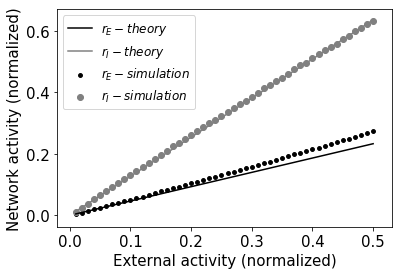

In [67]:
plt.scatter(external[0:50],r_E1[0:50],label=r"$r_E - simulation$",color='black',s=15)
plt.scatter(external[0:50],r_I1[0:50],label=r"$r_I - simulation$",color='grey')
plt.plot(external[0:50],r_et[0:50],label=r"$r_E - theory$",color='black')
plt.plot(external[0:50],r_it[0:50],label=r"$r_I - theory$",color='grey')
plt.xlabel("External activity (normalized)",fontsize=15)
plt.ylabel("Network activity (normalized)",fontsize=15)
plt.legend(fontsize=12)
plt.tick_params(labelsize=15) 
# plt.savefig('linear rate response.pdf',dpi=1000, bbox_inches = 'tight')

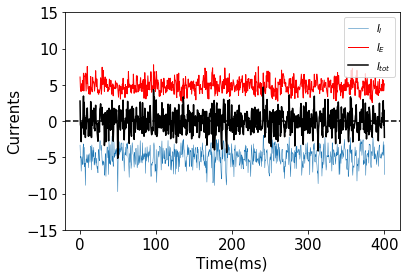

In [52]:
#plots for mean currents
fit3=[]
fit2=[]
fit2=(np.average((np.squeeze(current_i)),axis=1))[400:1200]

T=400
dt=0.5
xx=np.linspace(dt,T,int(T/dt))
plt.axhline(y=0, color='black', linestyle='--')
fit1=[]
fit1=(np.average((np.squeeze(current_e)),axis=1))[400:1200]
fit3=np.array(fit1)+np.array(fit2)
plt.plot(xx,fit2,label=r'$I_I$',linewidth=0.5)
plt.plot(xx,fit1,color='red',label=r'$I_E$',linewidth=1.0)

plt.plot(xx,fit3,color='black',label=r'$I_{tot}$',linewidth=1.5)
plt.xlabel("Time(ms)",fontsize=15)
plt.ylabel("Currents",fontsize=15)
plt.tick_params(labelsize=15) 
plt.ylim(-15,15)
plt.legend(fontsize=10)
# plt.savefig('ch15-2.pdf',dpi=1000, bbox_inches = 'tight')

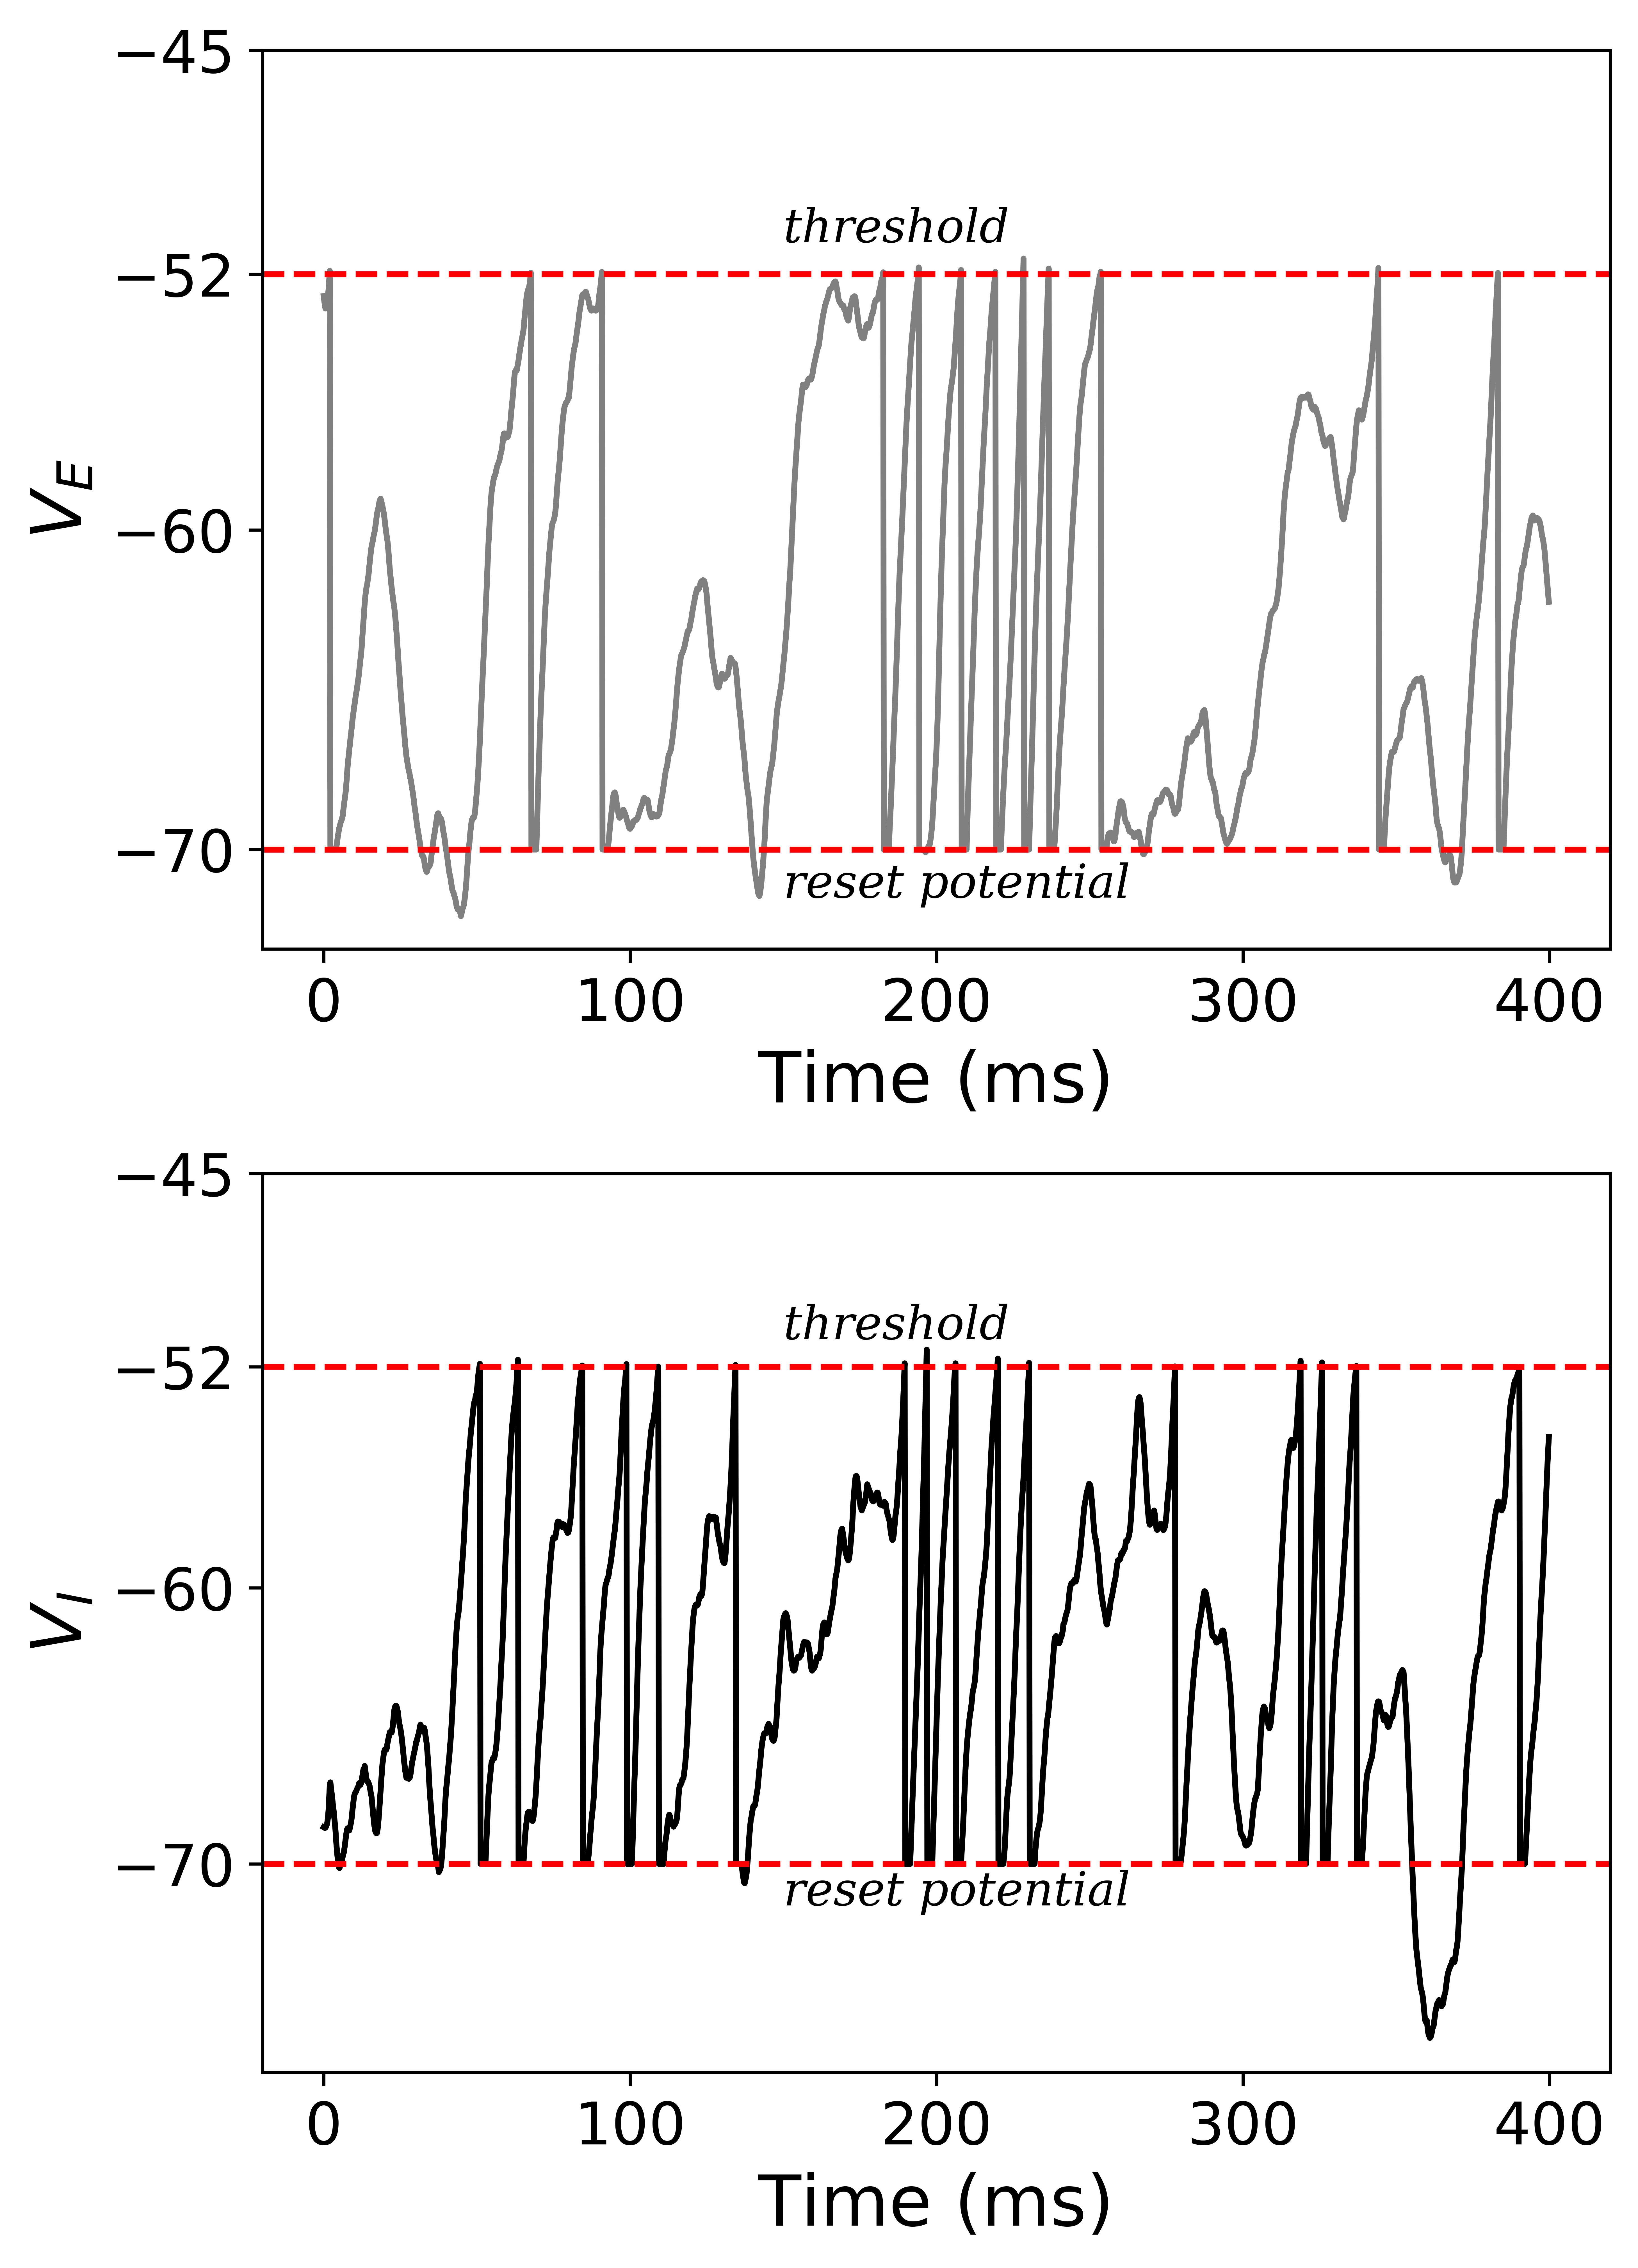

In [76]:
#membrane potential
from pylab import *  
from matplotlib.ticker import MultipleLocator, FormatStrFormatter  
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker

fig = plt.figure(num=2, figsize=(6,9),dpi=1000)
subplots_adjust(left=0.15,bottom=0.1,top=0.9,right=0.95,hspace=0.25,wspace=0.35)
#使用add_subplot在窗口加子图，其本质就是添加坐标系
#三个参数分别为：行数，列数，本子图是所有子图中的第几个，最后一个参数设置错了子图可能发生重叠
ax1 = fig.add_subplot(2,1,1)  
ax2 = fig.add_subplot(2,1,2)
number=7
xx=np.linspace(0,(400-0.2),int(400/0.2))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8

ax1.plot(xx,np.squeeze(V_e_all)[:,5],color='grey')

ax1.set_xlabel('Time (ms)',fontdict={'size'   : 18})
ax1.set_ylabel(r'$V_E$',fontdict={'size'   : 18})
ax1.tick_params(labelsize=15) 
ax1.axhline(y=-52, color='red', linestyle='--')
ax1.axhline(y=-70, color='red', linestyle='--')
ax1.set_yticks([-70,-60, -52,-45])
ax2.plot(xx,np.squeeze(V_i_all)[:,38],color='black')


ax2.set_xlabel('Time (ms)',size=18)
ax2.set_ylabel(r'$V_I$',fontdict={'size'   : 18})
ax2.axhline(y=-52, color='red', linestyle='--')
ax2.axhline(y=-70, color='red', linestyle='--')
ax2.tick_params(labelsize=15) 
ax1.text(150, -71.5, 'reset potential',fontsize=12, family='serif', style='italic')
ax1.text(150, -51, 'threshold',fontsize=12, family='serif', style='italic')
ax2.text(150, -71.5, 'reset potential',fontsize=12, family='serif', style='italic')
ax2.text(150, -51, 'threshold',fontsize=12, family='serif', style='italic')
ax2.set_yticks([-70,-60, -52,-45])

plt.savefig('membrane_2.pdf',dpi=1000, bbox_inches = 'tight')

plt.show()